# Visualizing Segmentation Annotation of Neuronal Cell Images

Annotations are provided as run length encoded masks for labeled PNG images. In this notebook, we will decode the annotation and overlay on the training images for visualization purposes.

Source: https://www.kaggle.com/c/sartorius-cell-instance-segmentation/data?select=sample_submission.csv

## Problem Questions
* Do we have to return (encode) annotaions?
* Why are there multiple annotations for one image id?

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [2]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [72]:
def to_runs(annotation):
    encoded_ints = [int(s) for s in encoding.split(" ")]
    starts = encoded_ints[::2]
    runs = encoded_ints[1::2]
    return starts, runs


def to_coord(index, height):
    """
    Parameters
    ----------
    index: int
        Zero-based linear index
    """
    row = index % height
    col = index // height

    return col,row


def to_img(annotation, width, height):
    starts, runs = to_runs(annotation)
    # img = np.full((height, width), np.nan)
    img = np.zeros((width, height))

    for start, run in zip(starts, runs):
        coords = [to_coord(i - 1, height) for i in range(start, start + run)]

        for c in coords:
            img[c] = 1

    return img

## Training Data
The training set is contains an id for the training image and an annotation associated with that id. The annotation is a sequence of numerical pairs, where the first number is the pixel location (one-based index) and the second number is the number of pixels after that position to highlight.

In [7]:
train_df = pd.read_csv('./sartorius-cell-instance-segmentation/train.csv')
train_df.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


Each image id can have multiple annotations associated with them

In [22]:
train_df.loc[train_df['id']=='0030fd0e6378']

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...
390,0030fd0e6378,264628 3 265328 8 266028 12 266729 15 267432 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
391,0030fd0e6378,268853 4 269553 10 270255 12 270958 12 271661 ...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
392,0030fd0e6378,2095 1 2798 3 3501 5 4203 7 4906 9 5609 10 631...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
393,0030fd0e6378,105571 3 106274 5 106978 5 107682 6 108386 6 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


The training images are named with the image id

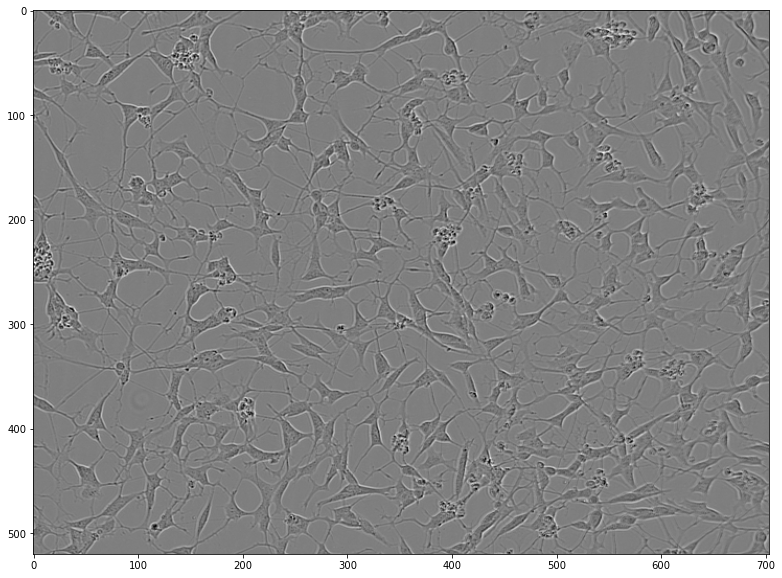

In [25]:
img=mpimg.imread('./sartorius-cell-instance-segmentation/train/0030fd0e6378.png')
imgplot = plt.imshow(img, cmap='gray')

The annotations for a given image can be generated by converting the annotation to highlighted image pixels

In [76]:
height = train_df.loc[0, "height"]
width = train_df.loc[0, "width"]
cell_img = np.zeros((height, width))
idxs = np.where(train_df['id'] == '0030fd0e6378')[0].tolist()

In [77]:
# for all of the annotiations, highlight the image pixels that are indicated in the annotations
for idx in idxs:
    encoding = train_df.loc[idx, "annotation"]
    cell_img += to_img(encoding, height, width)

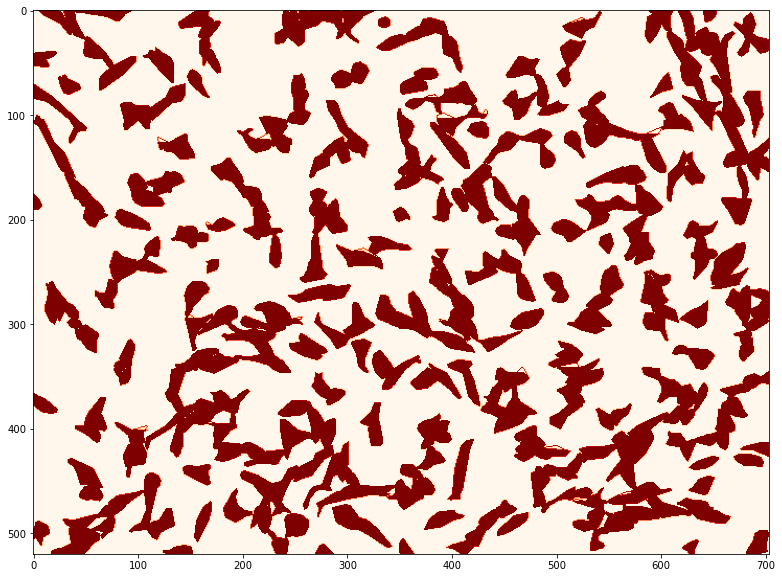

In [79]:
plt.imshow(cell_img > 0, alpha=1, cmap='OrRd')

If we lay the annotation over the image id, we get this

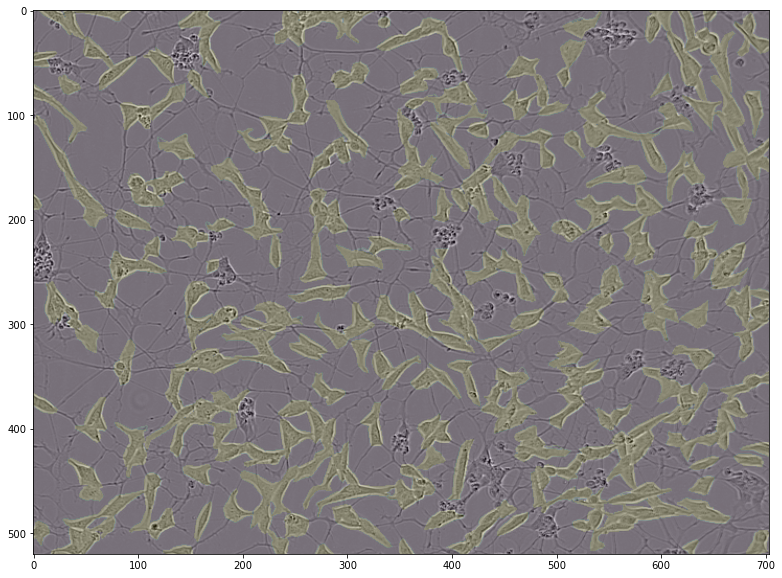

In [80]:
plt.imshow(cell_img > 0, alpha=1)
plt.imshow(img, alpha=0.9, cmap="gray")
plt.show()

Performing this operation for any unique image id provided

In [196]:
def visualize_annotation(img_id):
    # Plot the training image
    img=mpimg.imread(f'./sartorius-cell-instance-segmentation/train/{img_id}.png')
    print("Original Image:")
#     imgplot = plt.imshow(img, cmap='gray')
    
    # Get the values associated with that image id
    idxs = np.where(train_df['id'] == img_id)[0].tolist()
    height = train_df.loc[idxs[0], "height"]
    width = train_df.loc[idxs[0], "width"]
    # Reset the cell image
    cell_img = np.zeros((height, width))

    # for all of the annotiations, highlight the image pixels that are indicated in the annotations
    for idx in idxs:
        encoding = train_df.loc[idx, "annotation"]
        cell_img += to_img(encoding, height, width)
    
    # plot the highlighted annotations
#     plt.imshow(cell_img > 0, alpha=1, cmap='OrRd')
    
    # overlay the annotations on the training image
    plt.imshow(cell_img > 0, alpha=1)
#     plt.imshow(img, alpha=0.9, cmap="gray")
    plt.show()

In [197]:
# all of the unique image ids in the training data
print(f"Number of unique images: {len(pd.unique(train_df['id']))}")
choice_id = random.choice(pd.unique(train_df['id']))
print(f"Selected Image id: f{choice_id}")

Number of unique images: 606
Selected Image id: fc4dc7ddff8ec


Original Image:


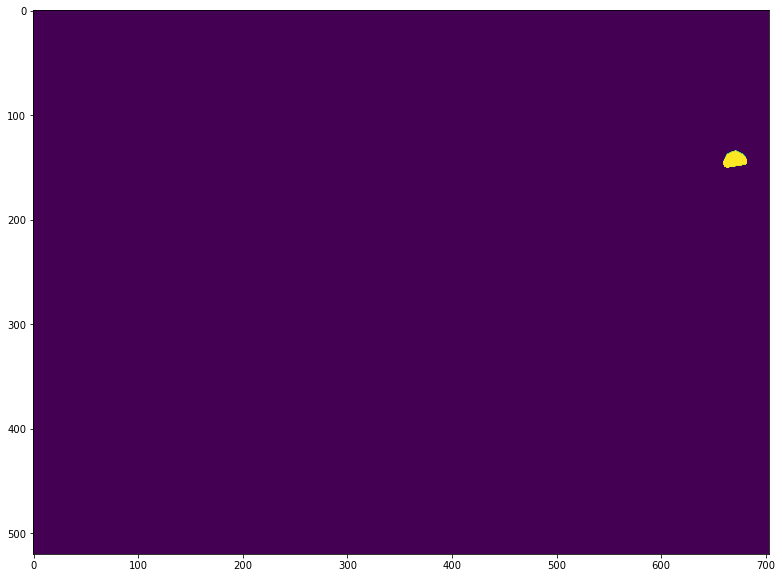

In [198]:
visualize_annotation(choice_id)